In [1]:
import os
from os.path import expanduser
import socket
import sys


# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "awi-models")
elif running_system[0] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"awi-models")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules")
#########################################

computer =  bfn1001
working directory set to /home/hbkoziel/awi-models


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import colormaps as cmaps
from matplotlib.colors import ListedColormap

In [3]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = plt.get_cmap('RdBu_r')
# figure export 
export_plot = True
# figure export definition
dpicnt=150
# choose simulation
runid='Arc12'
# choose date
first_year = 1990
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
get3d = False

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/awi-models/figures/Arc12/ already existing


In [4]:
mesh = fesom_mesh(meshpath, get3d = get3d)
#mesh = load_mesh(meshpath)

Load 2d part of the grid in 3 second(s)


In [5]:
# initlialyze
MLD = np.empty((len(years),mesh.n2d))
#DATE = np.empty((len(years)))

# loop over years - months: Jan-Apr
for ind in range(0,len(years)):
    print years[ind]
    ncfile = resultpath+runid+'.'+str(years[ind])+'.oce.diag.nc'
    f      = Dataset(ncfile, 'r')
    if years[ind] < 2000:
         mld    = f.variables['mixlay'][:,0:mesh.n2d].mean(axis=0) 
    else:
         mld    = f.variables['mixlay'][:,0:mesh.n2d].mean(axis=0)    
     
    MLD[ind,:]=mld

1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [10]:
result_fit = np.ma.polyfit(years,MLD,1)

In [11]:
data2 = result_fit[0,:]
print data2.mean()
print data2.std()
print data2.min()
print data2.max()

-0.3814377909297684
2.544607149968409
-60.61600103394308
18.178868618174008


ftriplot, number of dummy points: 0


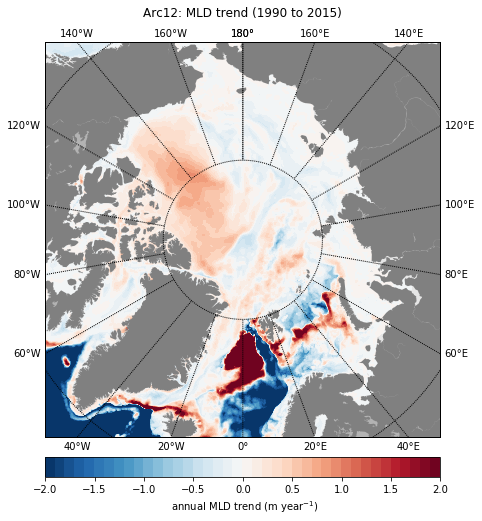

In [12]:
#contours=np.array([-7, -6, -5, -4, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7])

contours = [-2, 2, 0.1]
contours = np.arange(contours[0], contours[1]+contours[2], contours[2])
fig = plt.figure(figsize=(8,8), facecolor='w', edgecolor='k')
elem2=mesh.elem#[mesh.no_cyclic_elem,:]
d=data2[elem2].mean(axis=1)
k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[True,True,True,True]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
label = runid+': MLD trend ('+str(years[0])+' to '+str(years[len(years)-1])+')'
plt.title(label,y=1.05)
cbar=map.colorbar(im,"bottom", size="5%", pad="5%")
cbar.set_label(r' annual MLD trend (m year$^{-1}$)')
    
if export_plot == True:
        plt.savefig(savepath+'MLDspatialannual_trend_'+str(years[0])+'_'+str(years[-1])+'.png', dpi = dpicnt, bbox_inches='tight') 

plt.show() 